In [167]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [168]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [169]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [170]:
# Customer ID is removed, because it is a unique identifier of customer and no conclusion can be drawn from it
df = df.drop(['customerID'], axis=1)

In [171]:
# Check for null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [172]:
# Keep a list of all columns that have categorical data
print(df.columns)
print(df.head())

cols = df.columns


# Note that Contract is ordinal (ordered sequence : Month-to-month, One year, Two year)
# Here, we manualy specify name of columns that have categorical data. This can easily be replaced by using df.iloc[] if required.
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling', 'PaymentMethod']


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No    

In [173]:
# Categorical values in dataset need to be replaced by numerical values
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,0,3,56.95,1889.5,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,One year,1,3,84.80,1990.5,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,One year,1,1,103.20,7362.9,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,Month-to-month,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,Month-to-month,1,3,74.40,306.6,Yes


In [174]:
# Use ordinal encoding for the contract
ordinal_encoder = OrdinalEncoder()
df['Contract'] = ordinal_encoder.fit_transform(df[['Contract']])
df['Contract'] = df['Contract'].astype(np.int32)

df
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,Yes


In [175]:
# We want Churn value of No to map to 0 and Yes to map to 1
df['Churn'].replace(['No', 'Yes'], [0, 1], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [176]:
# Now that all the values are numerical, we can check the correlation coefficients.
df.corrwith(df["Churn"]).abs().sort_values()

C:\Users\Tarun\AppData\Local\Temp\ipykernel_19856\2015793463.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["Churn"]).abs().sort_values()


gender              0.008612
PhoneService        0.011942
StreamingTV         0.036581
MultipleLines       0.038037
StreamingMovies     0.038492
InternetService     0.047291
PaymentMethod       0.107062
Partner             0.150448
SeniorCitizen       0.150889
Dependents          0.164221
DeviceProtection    0.178134
PaperlessBilling    0.191825
MonthlyCharges      0.193356
OnlineBackup        0.195525
TechSupport         0.282492
OnlineSecurity      0.289309
tenure              0.352229
Contract            0.396713
Churn               1.000000
dtype: float64

In [177]:
# Here, gender, phone service, streaming tv, multiple lines, streaming movies, and internet service do not contribute much towards the target variable, as thier correlation coeffs are extremely low (i.e < 0.05).
# Hence, removing these columns from the data frame.
df = df.drop(['gender', 'PhoneService', 'StreamingTV', 'MultipleLines', 'StreamingMovies', 'InternetService'], axis=1)

In [178]:
# Data frame after basic data processing.
df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.5,0
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.9,0
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.6,1


C:\Users\Tarun\AppData\Local\Temp\ipykernel_19856\3174864646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abs(df.corr())


<AxesSubplot: >

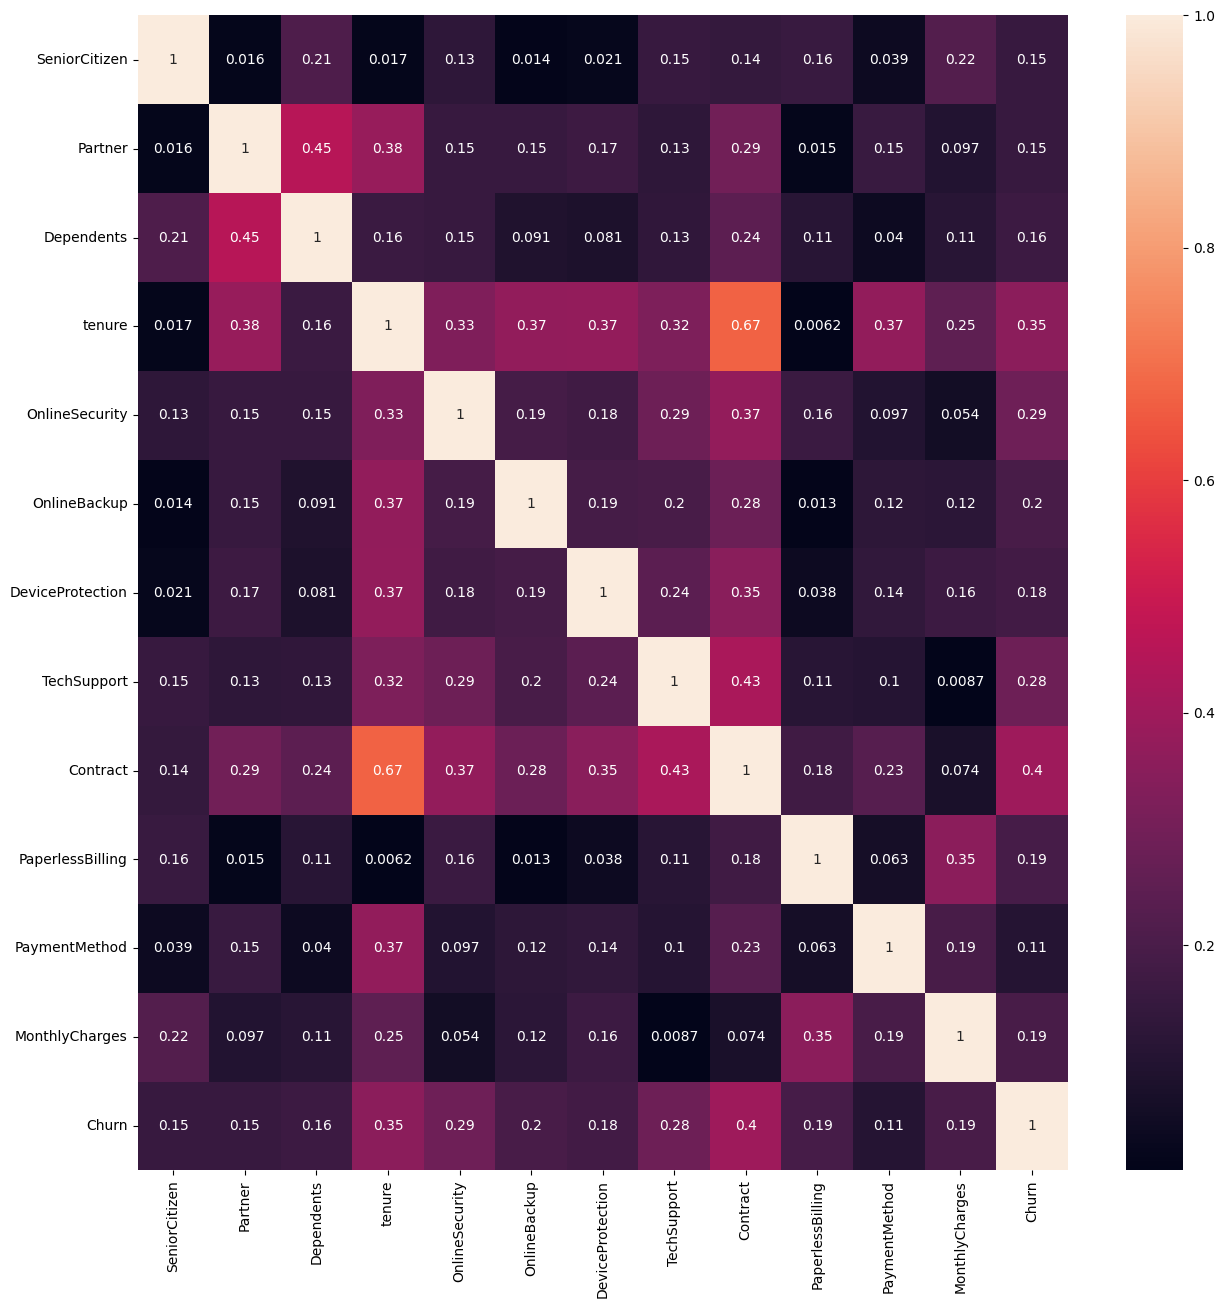

In [179]:

# Finding correlation between each independent variables to determine the unique variables.
corr = abs(df.corr())
plt.figure(figsize=(15,15))
sb.heatmap(corr, annot=True)


In [180]:
# It can be observed that Contract and Tenure have a correlation of 0.67. As it is unlikely that having
# both independent variables would be of help to us (as they are highly correlated).
# As Contract has a higher correlation with churn when compared to tenure, we can drop tenure.
# NOTE : I'm not sure if 0.67 is high enough so remove the record.
df = df.drop(['tenure'], axis=1)
df

,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,2,0,2,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,2,0,2,2,1,1,3,84.80,1990.5,0
7039,0,1,1,0,2,2,0,1,1,1,103.20,7362.9,0
7040,0,1,1,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,0,0,0,0,0,1,3,74.40,306.6,1


<AxesSubplot: ylabel='MonthlyCharges'>

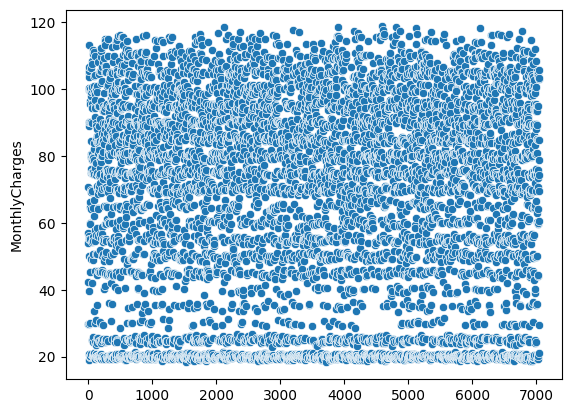

In [181]:
# Plotting a scatter plot for monthly charges to note how spread out the data is.
x = []
for i in range(len(df['MonthlyCharges'])):
    x.append(i)

sb.scatterplot(data=df, y=df['MonthlyCharges'], x=x)

In [182]:
# We can observe that monthly charges ranges equallly in the range (20, 120). We can scale this range to (0, 100) for simplifying calculations
# and interpretations.
# NOTE : not sure if min max scaling (or scaling in general) is appropirate here.

min_max_scaler = MinMaxScaler(feature_range=(0,100))
df['MonthlyCharges'] = min_max_scaler.fit_transform(df[['MonthlyCharges']])
df

,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,2,0,0,0,1,2,11.542289,29.85,0
1,0,0,0,2,0,2,0,1,0,3,38.507463,1889.5,0
2,0,0,0,2,2,0,0,0,1,3,35.422886,108.15,1
3,0,0,0,2,0,2,2,1,0,0,23.930348,1840.75,0
4,0,0,0,0,0,0,0,0,1,2,52.189055,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,2,0,2,2,1,1,3,66.218905,1990.5,0
7039,0,1,1,0,2,2,0,1,1,1,84.527363,7362.9,0
7040,0,1,1,2,0,0,0,0,1,2,11.293532,346.45,0
7041,1,1,0,0,0,0,0,0,1,3,55.870647,306.6,1


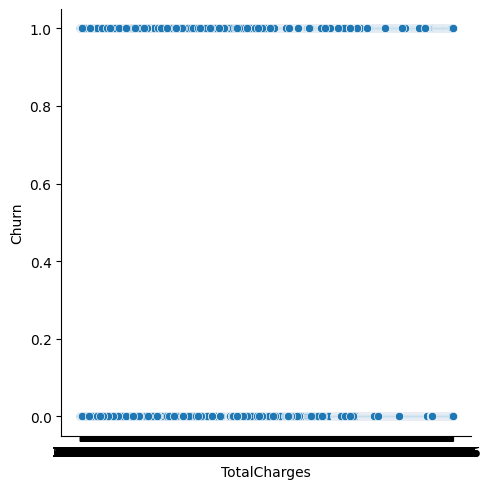

In [183]:
# Plotting the total charges against churn rate to draw inferences.
sb.relplot(x=df['TotalCharges'], y=df['Churn'])